# Infer CNV on lung cancer dataset

In [2]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import anndata as ad

sc.settings.set_figure_params(figsize=(5, 5))

/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sc.logging.print_header()

/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/carmenrobinson/miniconda3/envs/sing

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.10


/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


## Loading the example dataset

In [10]:
#adata = cnv.datasets.maynard2020_3k()
adata = ad.read_text('/Users/carmenrobinson/Documents/GitHub/infercnvpy/Lee_2020/GSE132465_GEO_processed_CRC_10X_natural_log_TPM_matrix.txt')
adata.var

Empty DataFrame
Columns: []
Index: [SMC01-T_AAACCTGCATACGCCG, SMC01-T_AAACCTGGTCGCATAT, SMC01-T_AAACCTGTCCCTTGCA, SMC01-T_AAACGGGAGGGAAACA, SMC01-T_AAACGGGGTATAGGTA, SMC01-T_AAAGATGAGGCCGAAT, SMC01-T_AAAGATGCATGGATGG, SMC01-T_AAAGATGTCACGACTA, SMC01-T_AAAGATGTCCGTTGCT, SMC01-T_AAAGCAACAGTCGATT, SMC01-T_AAAGTAGAGAGGTACC, SMC01-T_AAAGTAGAGGGCTTGA, SMC01-T_AAAGTAGCAAGGACAC, SMC01-T_AAAGTAGCAAGTAGTA, SMC01-T_AAAGTAGTCAGCATGT, SMC01-T_AAAGTAGTCTAACTGG, SMC01-T_AAAGTAGTCTCGCATC, SMC01-T_AAATGCCAGGATCGCA, SMC01-T_AAATGCCTCATTTGGG, SMC01-T_AACACGTTCTGGCGAC, SMC01-T_AACCATGCATCACGTA, SMC01-T_AACCATGCATCGACGC, SMC01-T_AACCATGGTATAGTAG, SMC01-T_AACCATGTCACAGTAC, SMC01-T_AACCATGTCCTTGACC, SMC01-T_AACCGCGAGTAGCGGT, SMC01-T_AACCGCGCAGCTCGAC, SMC01-T_AACCGCGTCTAACCGA, SMC01-T_AACCGCGTCTTTACGT, SMC01-T_AACGTTGGTAAGGGAA, SMC01-T_AACGTTGGTGCGGTAA, SMC01-T_AACTCAGGTTCCGGCA, SMC01-T_AACTCCCGTTTGTTGG, SMC01-T_AACTCCCTCTGCAGTA, SMC01-T_AACTCTTAGTCCGTAT, SMC01-T_AACTCTTCACAACGCC, SMC01-T_AACTCTTGTTCGTCTC, SMC01-T_AACTCTTGTTGCGTTA, SMC01-T_AACTCTTTCTGGTATG, SMC01-T_AACTTTCAGGCTAGCA, SMC01-T_AACTTTCGTACTCGCG, SMC01-T_AACTTTCGTTCGGGCT, SMC01-T_AAGACCTAGGTAAACT, SMC01-T_AAGACCTCAGTGGAGT, SMC01-T_AAGCCGCTCCAAACTG, SMC01-T_AAGGAGCAGCGTTCCG, SMC01-T_AAGGAGCCACATGGGA, SMC01-T_AAGGAGCCACTGAAGG, SMC01-T_AAGGAGCCATCGGACC, SMC01-T_AAGGAGCTCAGGCAAG, SMC01-T_AAGGAGCTCTAGAGTC, SMC01-T_AAGGCAGCAAAGGCGT, SMC01-T_AAGGTTCCACGTCTCT, SMC01-T_AAGGTTCTCCAATGGT, SMC01-T_AAGTCTGAGTAAGTAC, SMC01-T_AAGTCTGAGTGGTCCC, SMC01-T_AATCCAGAGTGCGTGA, SMC01-T_AATCCAGGTTTGTTGG, SMC01-T_AATCCAGTCCGCGGTA, SMC01-T_AATCGGTAGTGGAGTC, SMC01-T_AATCGGTAGTGGCACA, SMC01-T_AATCGGTCAATCGAAA, SMC01-T_AATCGGTGTCCAACTA, SMC01-T_ACACCAAGTACAGTTC, SMC01-T_ACACCAATCTCATTCA, SMC01-T_ACACTGACATTCTCAT, SMC01-T_ACACTGATCCTCCTAG, SMC01-T_ACAGCCGGTCTAGCCG, SMC01-T_ACAGCCGTCCCTAATT, SMC01-T_ACAGCTAGTTTGGCGC, SMC01-T_ACAGCTATCTGATTCT, SMC01-T_ACATACGAGTTGAGAT, SMC01-T_ACATACGCACGAAACG, SMC01-T_ACATACGTCTATCCCG, SMC01-T_ACATCAGGTAGCGTGA, SMC01-T_ACATCAGTCAGAGACG, SMC01-T_ACCAGTAAGATCGGGT, SMC01-T_ACCAGTATCGTCCAGG, SMC01-T_ACCCACTGTACTTAGC, SMC01-T_ACCGTAATCCCTGACT, SMC01-T_ACCTTTAAGTCGATAA, SMC01-T_ACCTTTATCCCACTTG, SMC01-T_ACCTTTATCGGTTCGG, SMC01-T_ACGAGCCCACATTCGA, SMC01-T_ACGAGGACAATCAGAA, SMC01-T_ACGAGGAGTCTCTCTG, SMC01-T_ACGATACGTAGGGTAC, SMC01-T_ACGCAGCAGGTTACCT, SMC01-T_ACGCAGCGTGTAAGTA, SMC01-T_ACGCAGCTCTACCTGC, SMC01-T_ACGCCAGCACTGCCAG, SMC01-T_ACGCCGAAGCTGCCCA, SMC01-T_ACGCCGAGTAACGTTC, SMC01-T_ACGCCGAGTCGTTGTA, SMC01-T_ACGCCGATCTAACTGG, SMC01-T_ACGGAGAAGGATGGAA, SMC01-T_ACGGAGACACGGTGTC, SMC01-T_ACGGCCAGTCATGCCG, SMC01-T_ACGGGCTAGGTGCAAC, SMC01-T_ACGGGCTAGTTCGCGC, ...]

[63689 rows x 0 columns]

In [18]:
adata

AnnData object with n_obs × n_vars = 33694 × 63689
    uns: 'log1p'

In [16]:
sc.pp.log1p(adata)

In [13]:
adata.var['chromosome'] = adata.var['chromosome'].apply(lambda x: 'chr' + str(x) if str(x).isnumeric() else x)

In [14]:
adata.var['chromosome'] = adata.var['chromosome'].apply(lambda x: 'chr' + str(x) if len(x)<2 else x)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


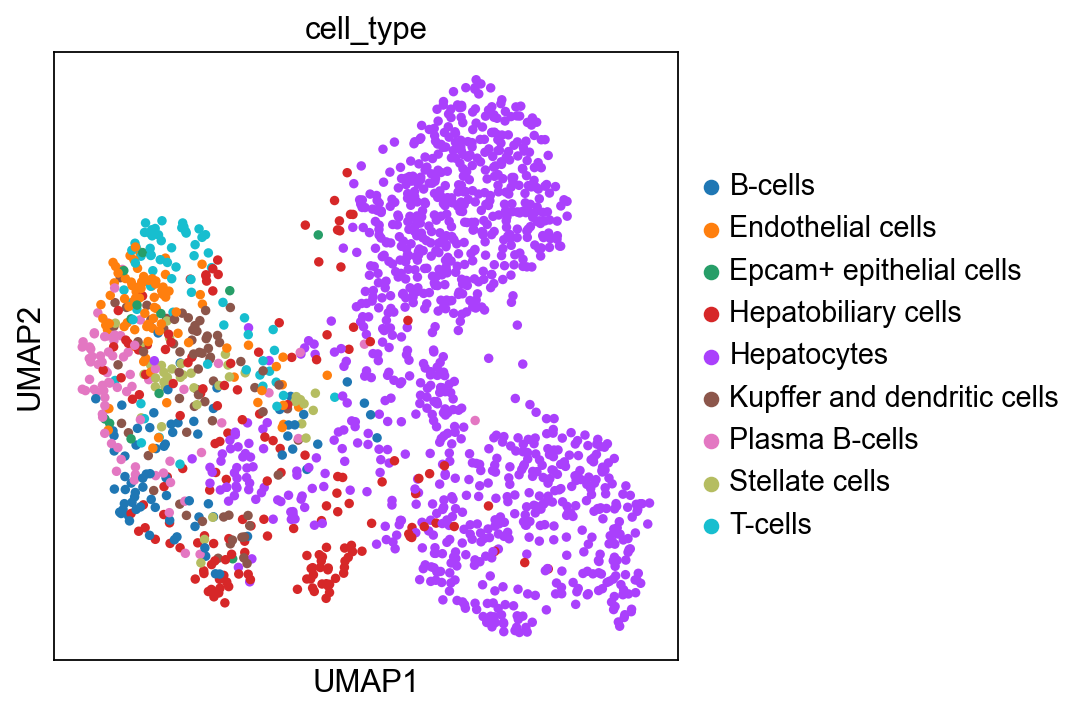

In [15]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata
           , color="cell_type")

In [16]:
adata.var['chromosome'].unique().tolist()

['chr3',
 'chr16',
 'chr11',
 'chr13',
 'chr4',
 'chr9',
 'chrY',
 'chr17',
 'chr7',
 'chrX',
 'chr5',
 'chr6',
 'chr2',
 'chr14',
 'chr10',
 'chr8',
 'chr15',
 'chr18',
 'chr1',
 'chr12',
 'chr19',
 'GL456233.1',
 'GL456221.1',
 'GL456216.1',
 'MT',
 'GL456211.1',
 'GL456210.1',
 'JH584304.1',
 'JH584299.1',
 'JH584297.1']

Let's first inspect the UMAP plot based on the transcriptomics data:

## Running infercnv

In [19]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
     reference_key="cell_type",
    reference_cat=["B-cells","Plasma B-cells", "Stellate cells", "T-cells"],
    window_size=250,
)

100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.72s/it]


Now, we can plot smoothed gene expression by cell-type and chromosome. 
We can observe that the Epithelial cell cluster, which consists largely of tumor cells, appears
to be subject to copy number variation. 

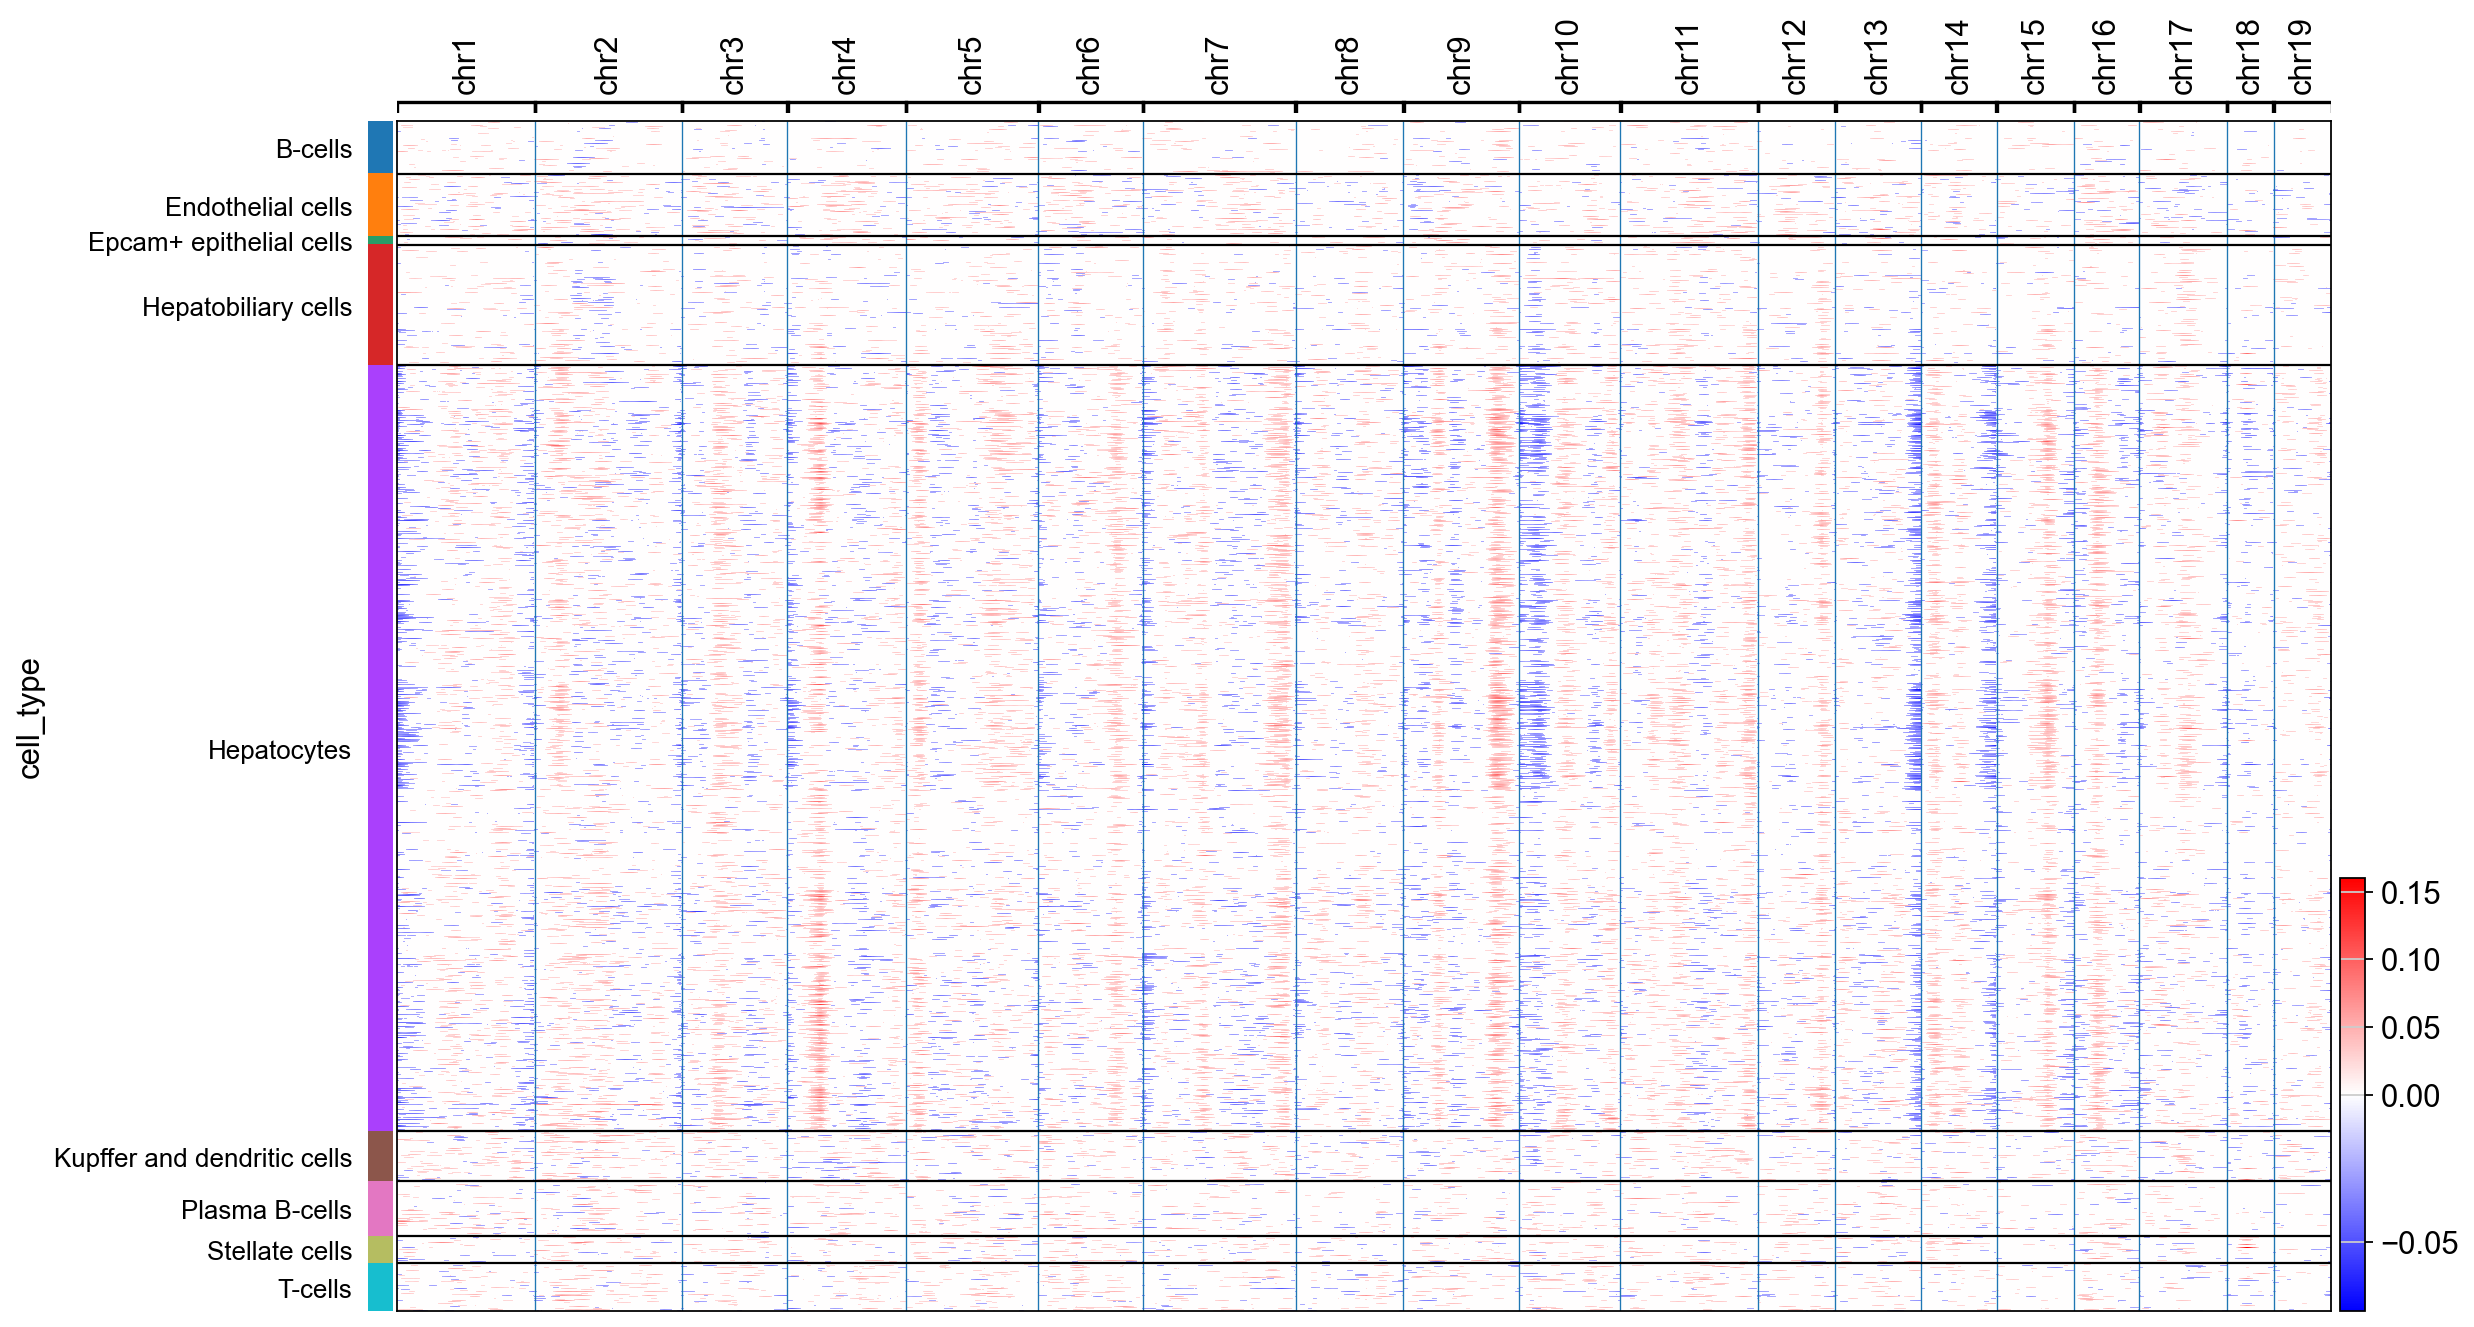

In [20]:
cnv.pl.chromosome_heatmap(adata, groupby="cell_type")

## Clustering by CNV profiles and identifying tumor cells

In [21]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

After running leiden clustering, we can plot the chromosome heatmap 
by CNV clusters. We can observe that, as opposted to the clusters 
at the bottom, the clusters at the top have essentially no differentially expressed genomic regions. 
The differentially expressed regions are likely due to copy number variation and the respective 
clusters likely represent tumor cells. 

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


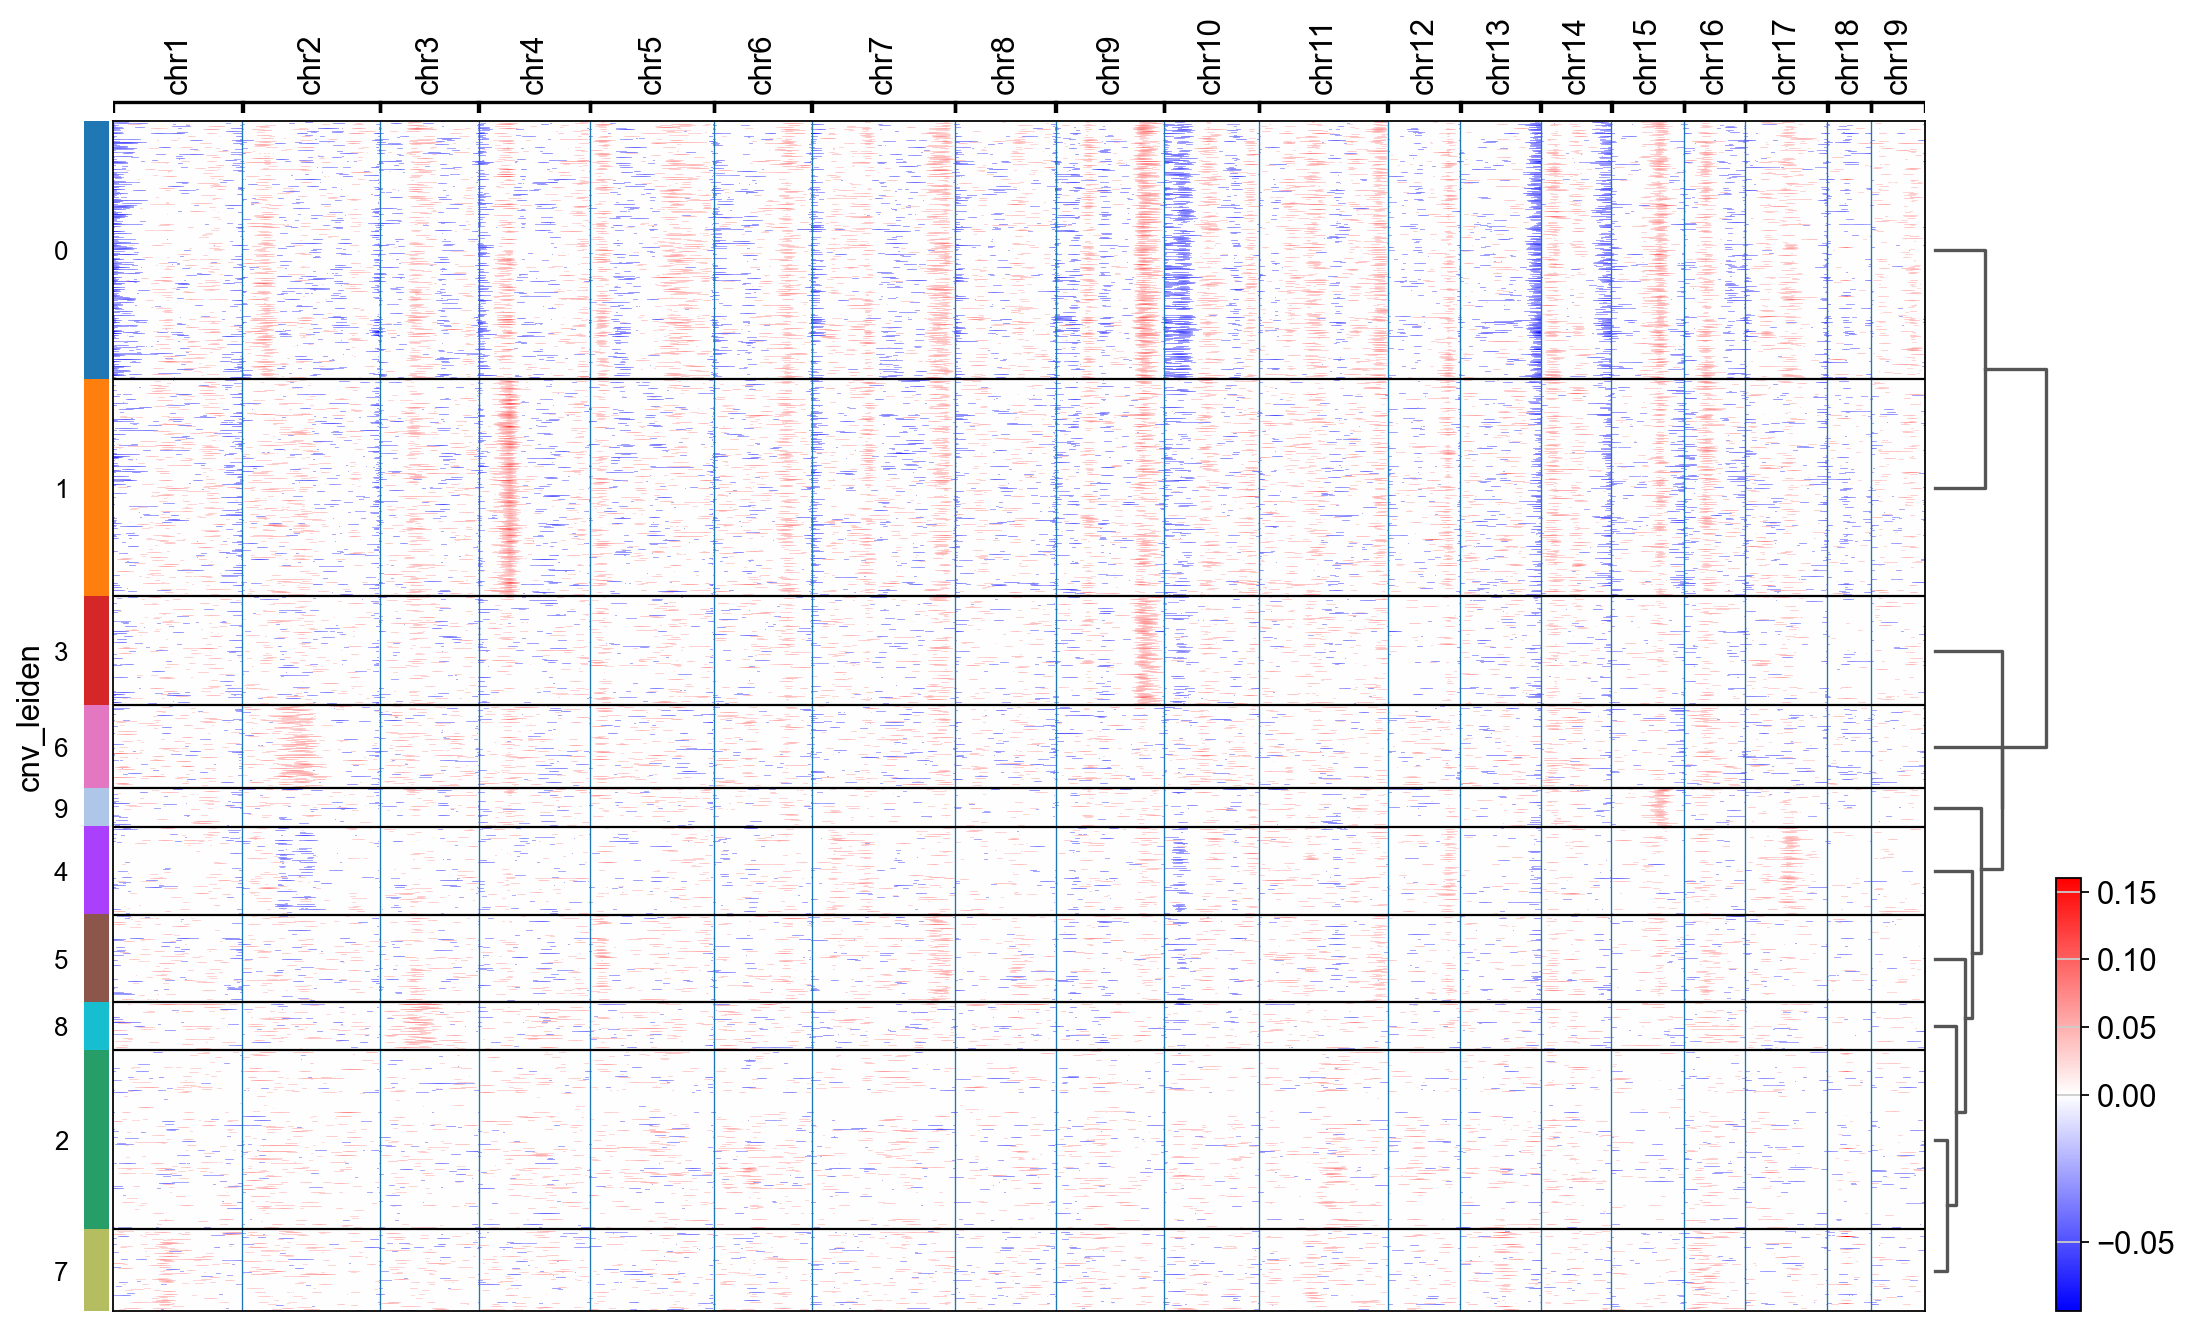

In [22]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=True)

### UMAP plot of CNV profiles

In [23]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)

The UMAP plot consists of a large blob of "normal" cells and several smaller clusters
with distinct CNV profiles. Except for cluster "12", which consists of ciliated cells, 
the isolated clusters are all epithelial cells. These are likely tumor cells and each 
cluster represents an individual sub-clone.

/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


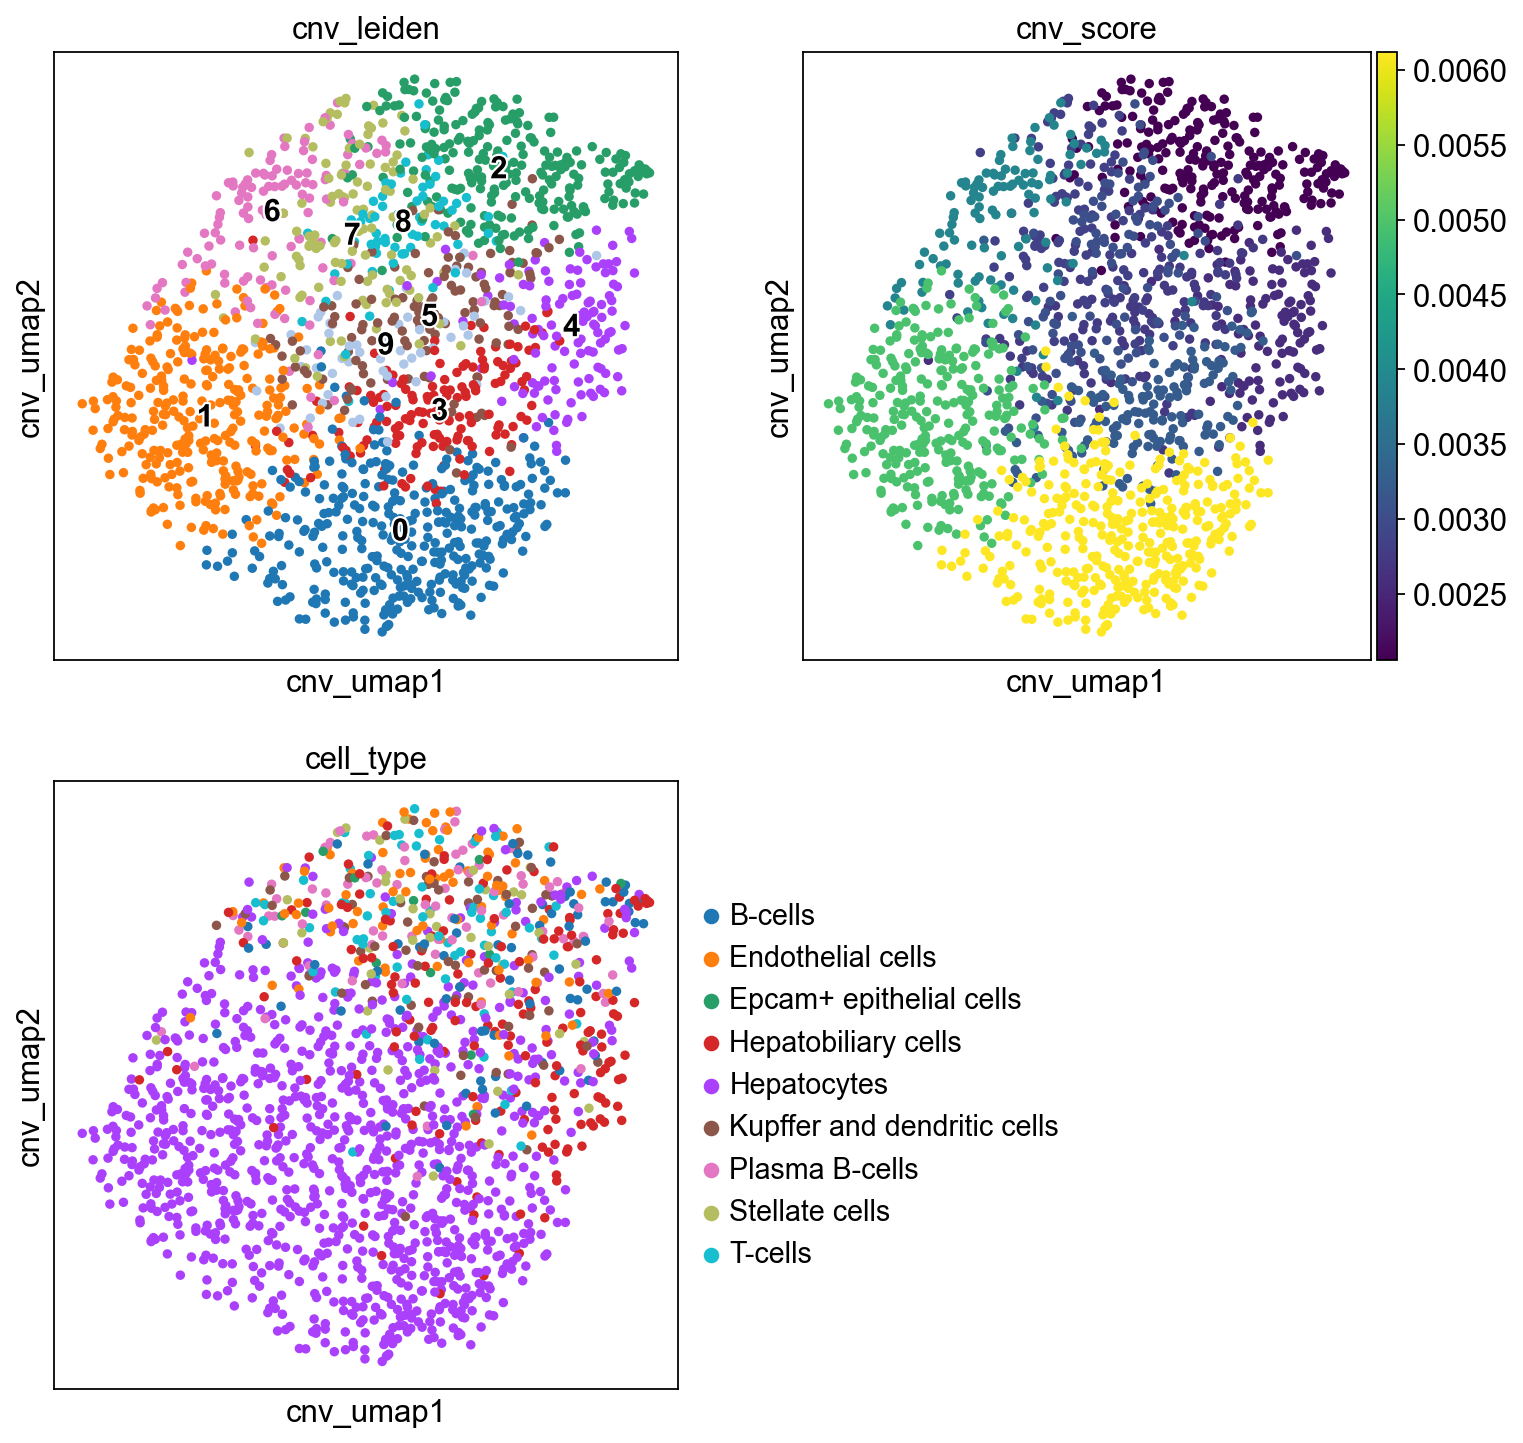

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 11))
ax4.axis("off")
cnv.pl.umap(
    adata,
    color="cnv_leiden",
    legend_loc="on data",
    legend_fontoutline=2,
    ax=ax1,
    show=False,
)
cnv.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
cnv.pl.umap(adata, color="cell_type", ax=ax3)

We can also visualize the CNV score and clusters on the transcriptomics-based UMAP plot. 
Again, we can see that there are subclusters of epithelial cells that belong
to a distinct CNV cluster, and that these clusters tend to have the 
highest CNV score. 

/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


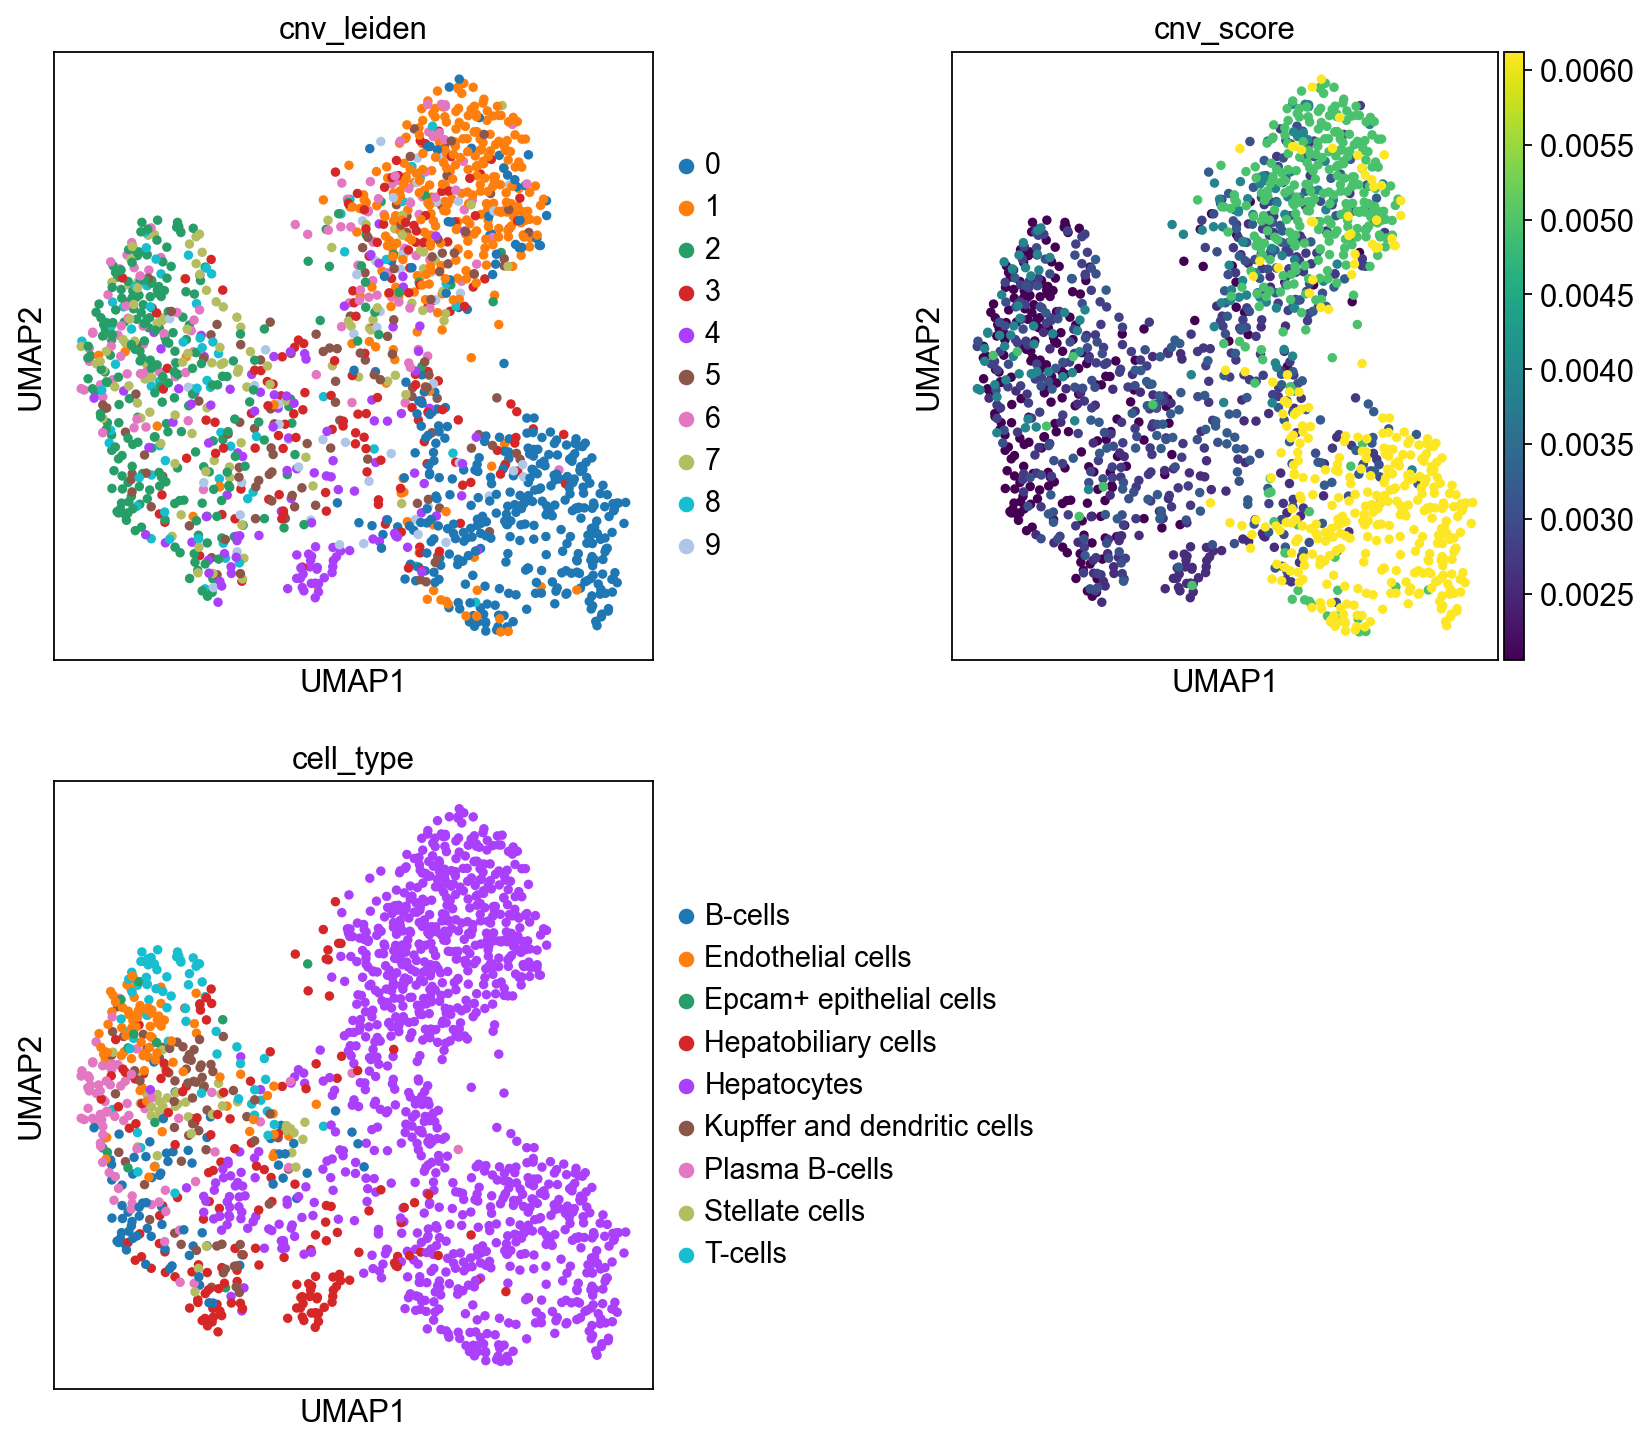

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(12, 11), gridspec_kw=dict(wspace=0.5)
)
ax4.axis("off")
sc.pl.umap(adata, color="cnv_leiden", ax=ax1, show=False)
sc.pl.umap(adata, color="cnv_score", ax=ax2, show=False)
sc.pl.umap(adata, color="cell_type", ax=ax3)

In [ ]:
high number: 0,1,

### Classifying tumor cells

Based on these observations, we can now assign cell to either "tumor" or "normal". 
To this end, we add a new column `cnv_status` to `adata.obs`. 

In [26]:
adata.obs["cnv_status"] = "normal"
adata.obs.loc[
    adata.obs["cnv_leiden"].isin([
        #"10", "13", "15", "5", "11", "16", "12"
   '0', '1' ]), "cnv_status"
] = 'altered'
#"tumor"

... storing 'cnv_status' as categorical
/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/carmenrobinson/miniconda3/envs/singlecell/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


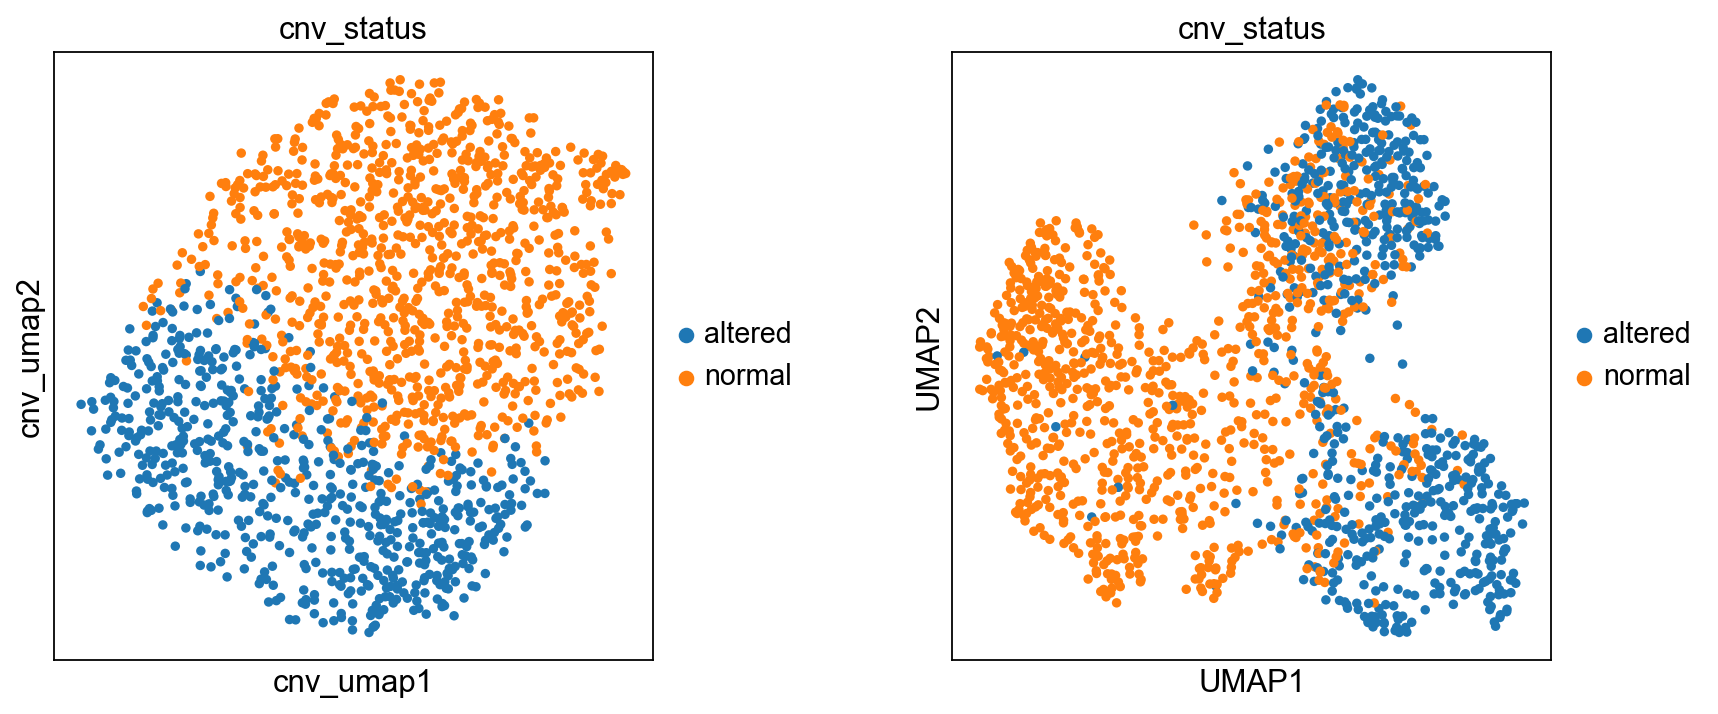

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw=dict(wspace=0.5))
cnv.pl.umap(adata, color="cnv_status", ax=ax1, show=False)
sc.pl.umap(adata, color="cnv_status", ax=ax2)

Now, we can plot the CNV heatmap for tumor and normal cells separately: 

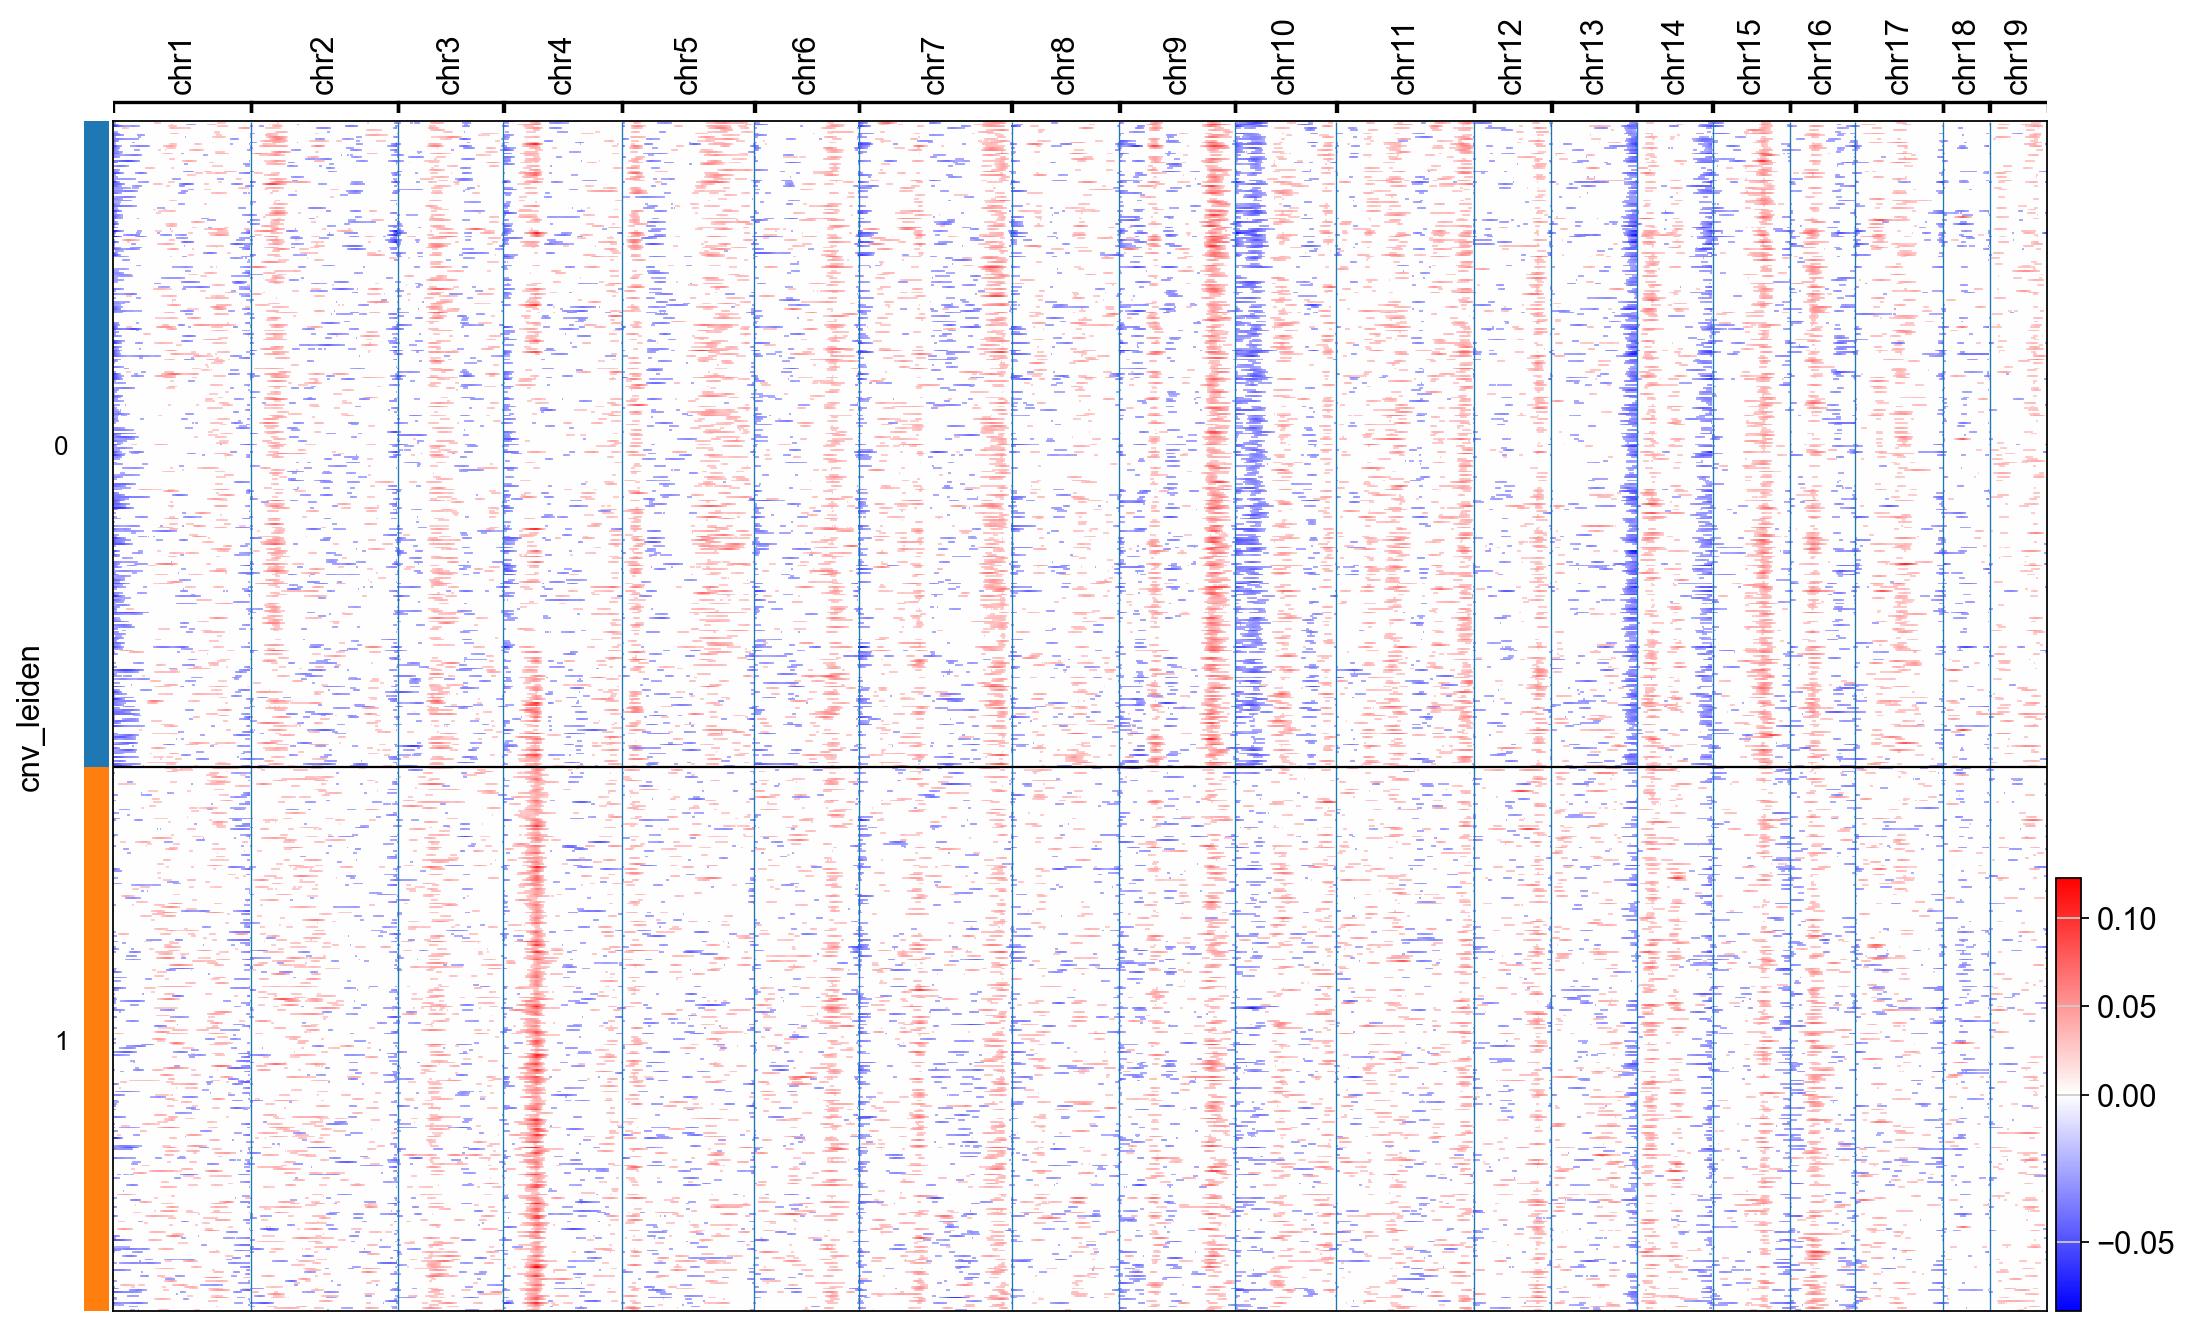

In [28]:
cnv.pl.chromosome_heatmap(adata[adata.obs["cnv_status"] == "altered", :])

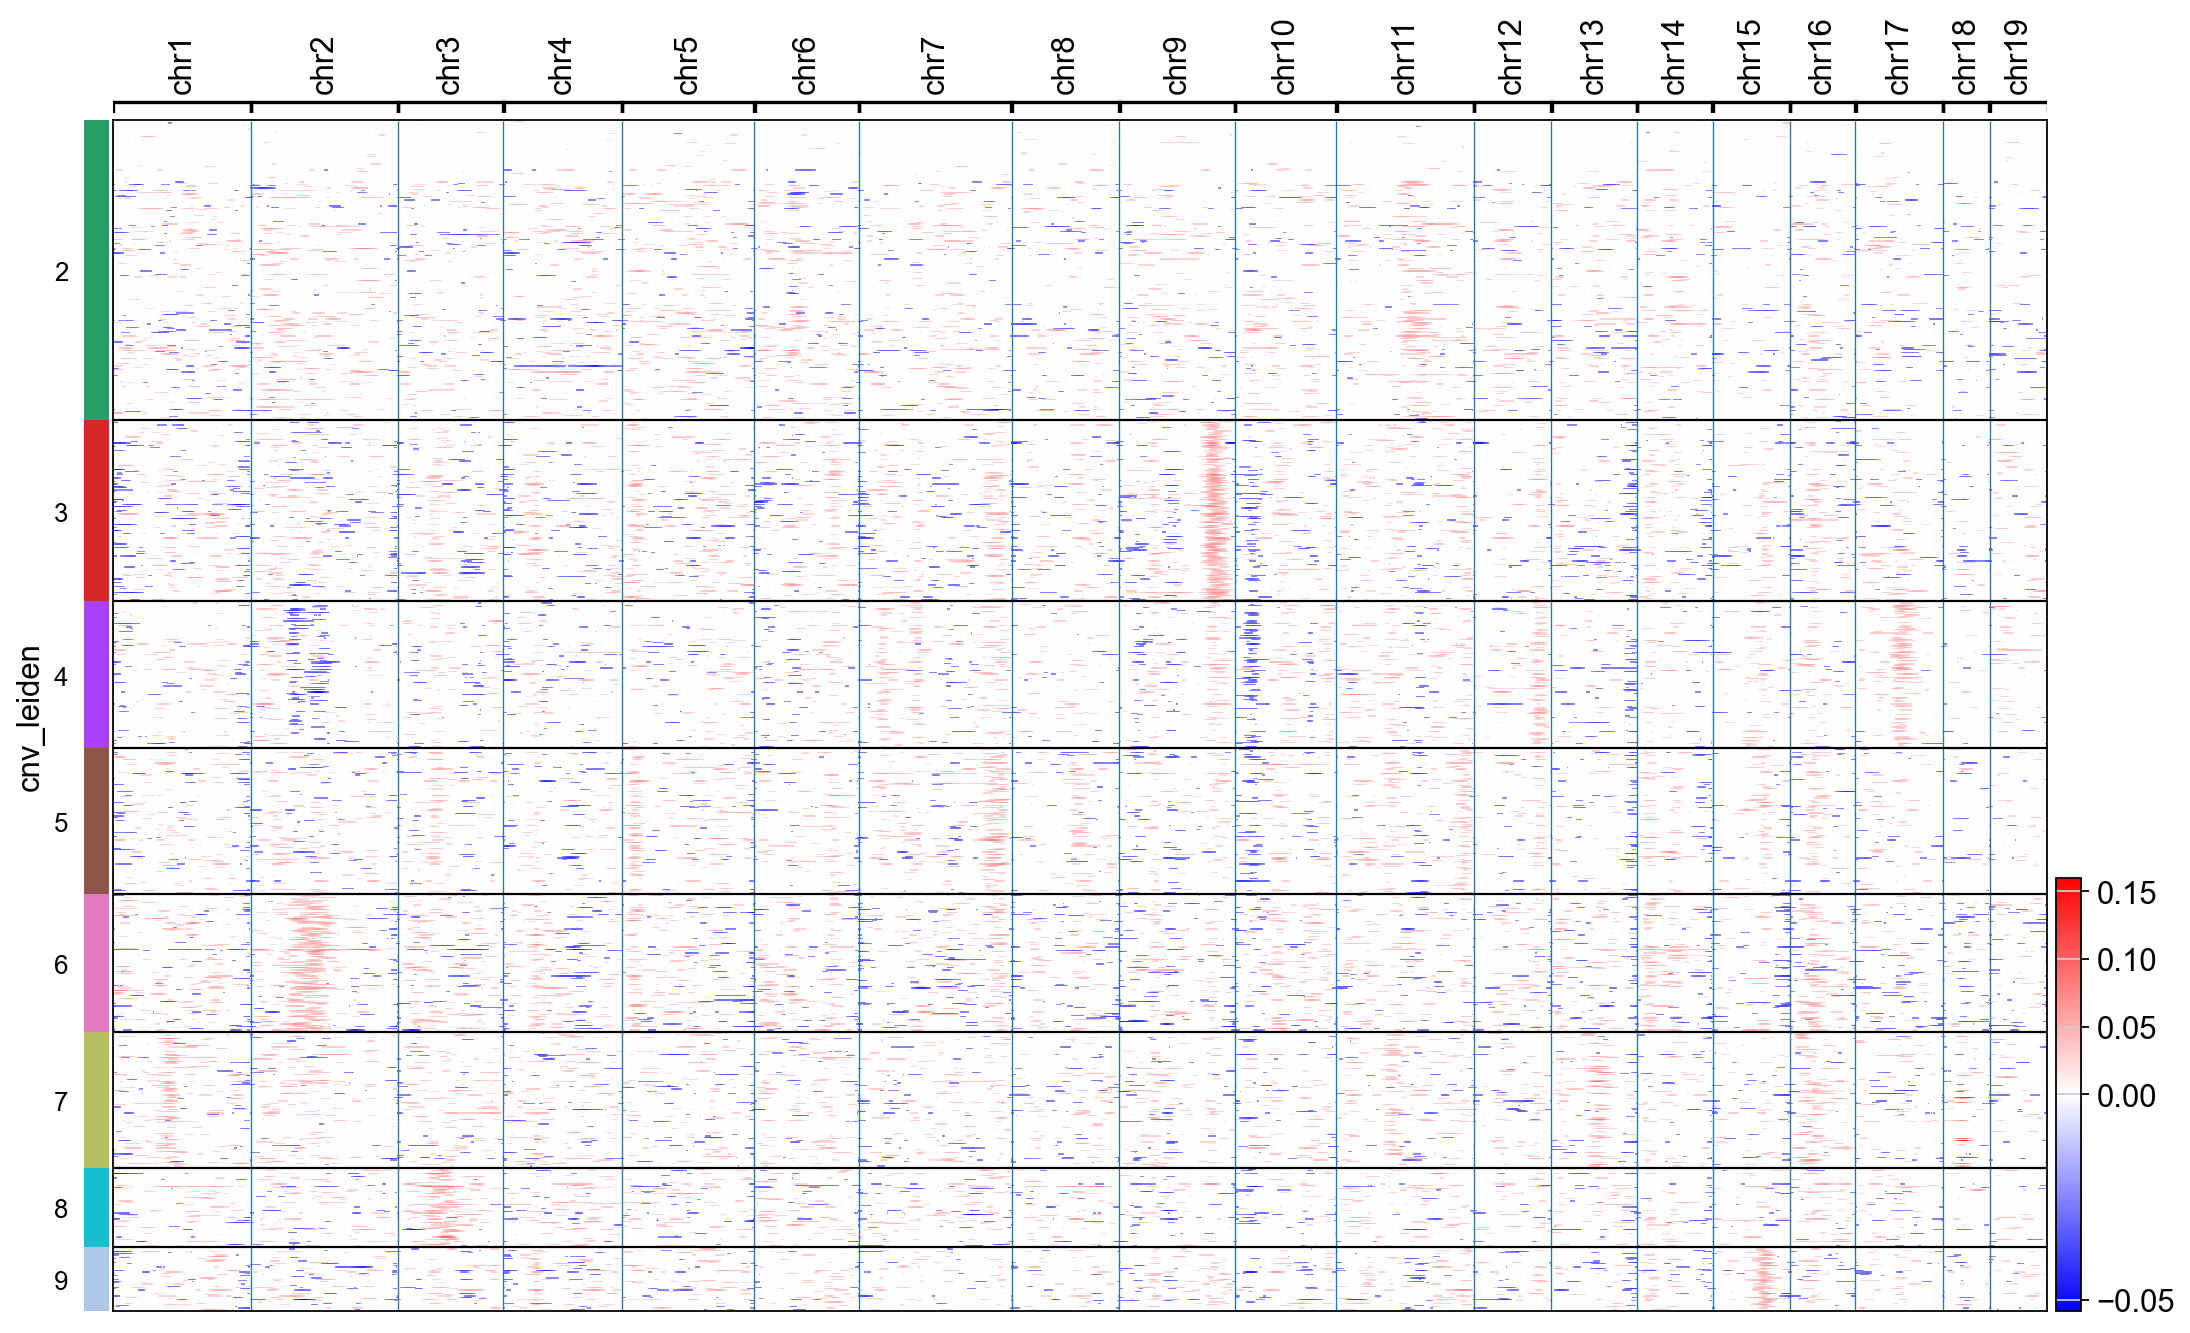

In [29]:
cnv.pl.chromosome_heatmap(adata[adata.obs["cnv_status"] == "normal", :])